In [2]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os

import matplotlib.pyplot as plt

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.7.0


In [4]:
dataset=r'food-101/food-101/images'

In [5]:
import pathlib
data_dir = pathlib.Path(dataset)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

101000


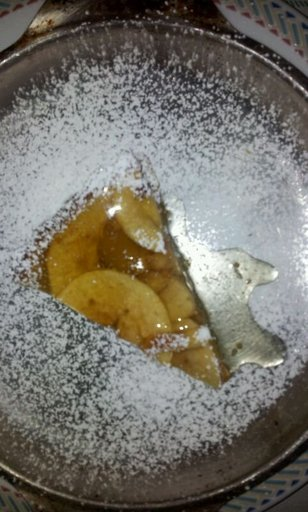

In [13]:
apple_pie = list(data_dir.glob('apple_pie/*'))
PIL.Image.open(str(apple_pie[0]))

In [11]:
[x[0] for x in os.walk(data_dir)]

['food-101\\food-101\\images',
 'food-101\\food-101\\images\\apple_pie',
 'food-101\\food-101\\images\\baby_back_ribs',
 'food-101\\food-101\\images\\baklava',
 'food-101\\food-101\\images\\beef_carpaccio',
 'food-101\\food-101\\images\\beef_tartare',
 'food-101\\food-101\\images\\beet_salad',
 'food-101\\food-101\\images\\beignets',
 'food-101\\food-101\\images\\bibimbap',
 'food-101\\food-101\\images\\bread_pudding',
 'food-101\\food-101\\images\\breakfast_burrito',
 'food-101\\food-101\\images\\bruschetta',
 'food-101\\food-101\\images\\caesar_salad',
 'food-101\\food-101\\images\\cannoli',
 'food-101\\food-101\\images\\caprese_salad',
 'food-101\\food-101\\images\\carrot_cake',
 'food-101\\food-101\\images\\ceviche',
 'food-101\\food-101\\images\\cheesecake',
 'food-101\\food-101\\images\\cheese_plate',
 'food-101\\food-101\\images\\chicken_curry',
 'food-101\\food-101\\images\\chicken_quesadilla',
 'food-101\\food-101\\images\\chicken_wings',
 'food-101\\food-101\\images\\chocolat

In [15]:
IMG_WIDTH=224
IMG_HEIGHT=224
batch_size=64

In [42]:
from collections import defaultdict
from shutil import copy

In [43]:
# function partisi
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [45]:
%cd /
print("Creating train data...")
prepare_data(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\meta\train.txt',
             r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\images', 'train')

C:\
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copyin

In [46]:
# partisi pake test.txt
print("Creating test data...")
prepare_data(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\meta\test.txt',
             r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [51]:
dataset = r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\images'

In [52]:
foods_sorted = sorted(os.listdir(dataset))
food_id = 0

In [53]:
del foods_sorted[0] # ilangin .DS_store file nya

In [54]:
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [55]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) #delete kalo  udah ada
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [56]:
food_list = ['macarons',
 'french_toast',
 'beef_carpaccio',
 'hot_and_sour_soup',
 'seaweed_salad',
 'pulled_pork_sandwich',
 'lobster_roll_sandwich',
 'carrot_cake',
 'red_velvet_cake',
 'grilled_cheese_sandwich',
 'spring_rolls',
 'omelette',
 'fried_calamari',
 'caprese_salad',
 'ramen',
 'grilled_salmon',
 'hamburger',
 'miso_soup',
 'bread_pudding',
 'crab_cakes',
 'cheesecake',
 'cup_cakes',
 'waffles',
 'fish_and_chips',
 'macaroni_and_cheese',
 'chocolate_mousse',
 'chicken_curry',
 'caesar_salad',
 'nachos',
 'frozen_yogurt',
 'ice_cream',
 'club_sandwich',
 'strawberry_shortcake',
 'steak',
 'garlic_bread',
 'chicken_wings',
 'greek_salad',
 'chocolate_cake',
 'samosa',
 'sushi',
 'beef_tartare',
 'apple_pie',
 'pizza',
 'french_onion_soup',
 'hot_dog',
 'chicken_quesadilla',
 'pancakes',
 'fried_rice',
 'cheese_plate',
 'onion_rings',
 'french_fries']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [58]:
from shutil import copytree, rmtree

In [59]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into macarons
Copying images into french_toast
Copying images into beef_carpaccio
Copying images into hot_and_sour_soup
Copying images into seaweed_salad
Copying images into pulled_pork_sandwich
Copying images into lobster_roll_sandwich
Copying images into carrot_cake
Copying images into red_velvet_cake
Copying images into grilled_cheese_sandwich
Copying images into spring_rolls
Copying images into omelette
Copying images into fried_calamari
Copying images into caprese_salad
Copying images into ramen
Copying images into grilled_salmon
Copying images into hamburger
Copying images into miso_soup
Copying images into bread_pudding
Copying images into crab_cakes
Copying images into cheesecake
Copying images into cup_cakes
Copying images into waffles
Copying images into fish_and_chips
Copying images into macaroni_and_cheese
Copying images into chocolate_mousse
Copying images into chicken_curry
Copying images into caesar_salad
Copying

In [68]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into macarons
Copying images into french_toast
Copying images into beef_carpaccio
Copying images into hot_and_sour_soup
Copying images into seaweed_salad
Copying images into pulled_pork_sandwich
Copying images into lobster_roll_sandwich
Copying images into carrot_cake
Copying images into red_velvet_cake
Copying images into grilled_cheese_sandwich
Copying images into spring_rolls
Copying images into omelette
Copying images into fried_calamari
Copying images into caprese_salad
Copying images into ramen
Copying images into grilled_salmon
Copying images into hamburger
Copying images into miso_soup
Copying images into bread_pudding
Copying images into crab_cakes
Copying images into cheesecake
Copying images into cup_cakes
Copying images into waffles
Copying images into fish_and_chips
Copying images into macaroni_and_cheese
Copying images into chocolate_mousse
Copying images into chicken_curry
Copying images into caesar_salad
Copying 

In [60]:
import tensorflow.keras.backend as K

## Pretrained model : InceptionResNetV2
Functional API + Fine tune

In [64]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [74]:
K.clear_session()
n_classes = 51
img_width, img_height = 299, 299
train_data_dir = r'C:\train_mini'
validation_data_dir = r'C:\test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2, #liat dari angle yang berbeda
    zoom_range=0.2, #zoom 
    horizontal_flip=True) #augmentasi + rescale untuk training

test_datagen = ImageDataGenerator(rescale=1. / 255) #rescale untuk testing

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionResNetV2(weights='imagenet', include_top=False)
x = inception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

predictions = tf.keras.layers.Dense(51,kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='softmax')(x)

model = tf.keras.Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
# checkpointer = ModelCheckpoint(filepath='best_model_51class.hdf5', verbose=1, save_best_only=True)
# csv_logger = CSVLogger('history_51class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=100,
                    verbose=1,
#                     callbacks=[csv_logger, checkpointer]
                             )

Found 38250 images belonging to 51 classes.
Found 12750 images belonging to 51 classes.


C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Fase_2\Week 3\Milestone2\Milestone2\lib\site-packages\ipykernel_launcher.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
140/140 [==============================] - 121s 772ms/step - loss: 4.3256 - accuracy: 0.0188 - val_loss: 4.3014 - val_accuracy: 0.0217
Epoch 2/100
140/140 [==============================] - 208s 1s/step - loss: 4.3015 - accuracy: 0.0251 - val_loss: 4.2865 - val_accuracy: 0.0367
Epoch 3/100
140/140 [==============================] - 336s 2s/step - loss: 4.2746 - accuracy: 0.0277 - val_loss: 4.2564 - val_accuracy: 0.0476
Epoch 4/100
140/140 [==============================] - 387s 3s/step - loss: 4.2652 - accuracy: 0.0388 - val_loss: 4.2426 - val_accuracy: 0.0584
Epoch 5/100
140/140 [==============================] - 397s 3s/step - loss: 4.2507 - accuracy: 0.0473 - val_loss: 4.2117 - val_accuracy: 0.0815
Epoch 6/100
140/140 [==============================] - 435s 3s/step - loss: 4.2412 - accuracy: 0.0460 - val_loss: 4.2096 - val_accuracy: 0.0720
Epoch 7/100
140/140 [==============================] - 430s 3s/step - loss: 4.2171 - accuracy: 0.0612 - val_loss: 4.1897 - val_accura

140/140 [==============================] - 267s 2s/step - loss: 2.3221 - accuracy: 0.4683 - val_loss: 1.6898 - val_accuracy: 0.6739
Epoch 58/100
140/140 [==============================] - 261s 2s/step - loss: 2.2178 - accuracy: 0.4973 - val_loss: 1.8387 - val_accuracy: 0.6046
Epoch 59/100
140/140 [==============================] - 262s 2s/step - loss: 2.2322 - accuracy: 0.5058 - val_loss: 1.7248 - val_accuracy: 0.6630
Epoch 60/100
140/140 [==============================] - 259s 2s/step - loss: 2.2109 - accuracy: 0.5152 - val_loss: 1.7109 - val_accuracy: 0.6440
Epoch 61/100
140/140 [==============================] - 259s 2s/step - loss: 2.1603 - accuracy: 0.5121 - val_loss: 1.7085 - val_accuracy: 0.6332
Epoch 62/100
140/140 [==============================] - 260s 2s/step - loss: 2.1514 - accuracy: 0.5089 - val_loss: 1.7240 - val_accuracy: 0.6291
Epoch 63/100
140/140 [==============================] - 255s 2s/step - loss: 2.1519 - accuracy: 0.5129 - val_loss: 1.6774 - val_accuracy: 0.660

In [79]:
model_version = "0001"
model_name = "my_food_model"
model_path = os.path.join(model_name, model_version)
model_path

'my_food_model\\0001'

In [80]:
tf.keras.models.save_model(model, model_path)

INFO:tensorflow:Assets written to: my_food_model\0001\assets


In [ ]:
imported = tf.keras.models.load_model(model_path)

In [85]:
from tensorflow.keras.preprocessing import image

In [81]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

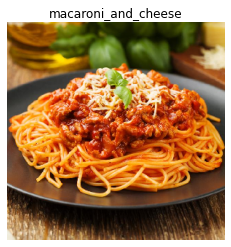

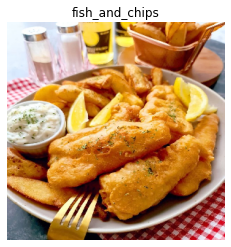

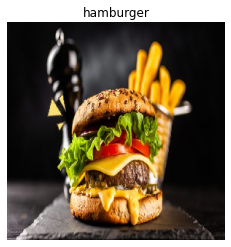

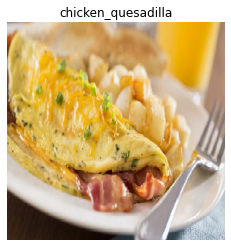

In [95]:
images = []
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\spaghetti.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\Fish-n-Chips.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\burger.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\omelette2.jpeg')

predict_class(model, images, True)

In [96]:
history2 = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=5,
                    verbose=1,
#                     callbacks=[csv_logger, checkpointer]
                             )

C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Fase_2\Week 3\Milestone2\Milestone2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
140/140 [==============================] - 95s 677ms/step - loss: 1.5711 - accuracy: 0.6536 - val_loss: 1.2937 - val_accuracy: 0.7364
Epoch 2/5
140/140 [==============================] - 110s 788ms/step - loss: 1.6091 - accuracy: 0.6504 - val_loss: 1.2776 - val_accuracy: 0.7242
Epoch 3/5
140/140 [==============================] - 163s 1s/step - loss: 1.6694 - accuracy: 0.6339 - val_loss: 1.1889 - val_accuracy: 0.7690
Epoch 4/5
140/140 [==============================] - 208s 1s/step - loss: 1.6746 - accuracy: 0.6353 - val_loss: 1.2460 - val_accuracy: 0.7514
Epoch 5/5
140/140 [==============================] - 288s 2s/step - loss: 1.5887 - accuracy: 0.6656 - val_loss: 1.0974 - val_accuracy: 0.7853


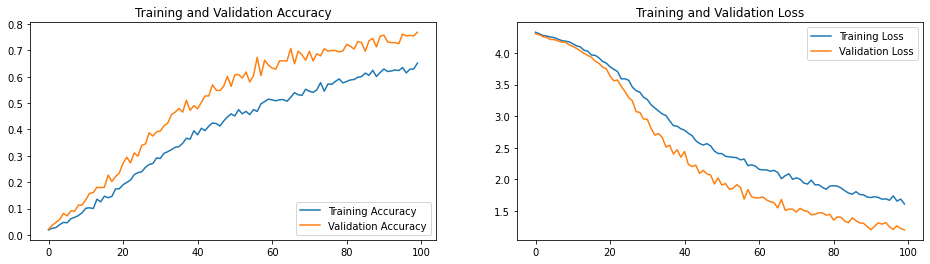

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [98]:
model_version = "0002"
model_name = "my_food_model"
model_path = os.path.join(model_name, model_version)
model_path

'my_food_model\\0002'

In [99]:
tf.keras.models.save_model(model, model_path)

INFO:tensorflow:Assets written to: my_food_model\0002\assets


In [100]:
history2 = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=15,
                    verbose=1,
#                     callbacks=[csv_logger, checkpointer]
                             )

C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Fase_2\Week 3\Milestone2\Milestone2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
140/140 [==============================] - 119s 849ms/step - loss: 1.6304 - accuracy: 0.6446 - val_loss: 1.1863 - val_accuracy: 0.7609
Epoch 2/15
140/140 [==============================] - 269s 2s/step - loss: 1.5649 - accuracy: 0.6536 - val_loss: 1.2086 - val_accuracy: 0.7717
Epoch 3/15
140/140 [==============================] - 340s 2s/step - loss: 1.6066 - accuracy: 0.6513 - val_loss: 1.1819 - val_accuracy: 0.7527
Epoch 4/15
140/140 [==============================] - 359s 3s/step - loss: 1.5221 - accuracy: 0.6790 - val_loss: 1.0915 - val_accuracy: 0.7826
Epoch 5/15
140/140 [==============================] - 342s 2s/step - loss: 1.5883 - accuracy: 0.6567 - val_loss: 1.1563 - val_accuracy: 0.7826
Epoch 6/15
140/140 [==============================] - 322s 2s/step - loss: 1.5628 - accuracy: 0.6603 - val_loss: 1.1799 - val_accuracy: 0.7717
Epoch 7/15
140/140 [==============================] - 314s 2s/step - loss: 1.5741 - accuracy: 0.6710 - val_loss: 1.0814 - val_accuracy: 0.7

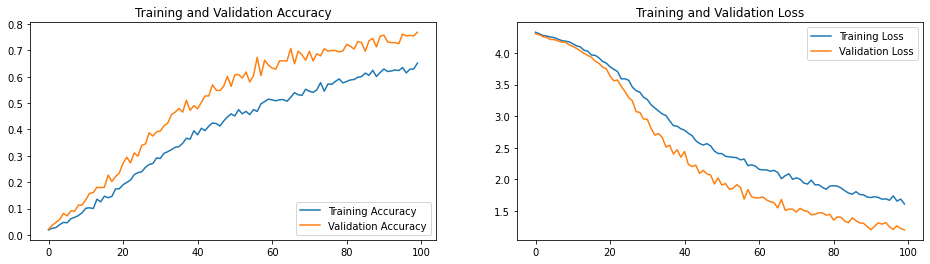

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
model_version = "0003"
model_name = "my_food_model"
model_path = os.path.join(model_name, model_version)
model_path

'my_food_model\\0003'

In [ ]:
tf.keras.models.save_model(model, model_path)

In [4]:
imported = tf.keras.models.load_model('0003')

In [5]:
images = []
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\spaghetti.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\Fish-n-Chips.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\burger.jpg')
images.append(r'C:\Users\Dandy Alfikri\Documents\Hacktiv8_DS\Final Project\food-101\food-101\test\omelette2.jpeg')

In [6]:
from os import name
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image,ImageOps
import pandas as pd
import joblib
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle5 as pickle

In [7]:
def teachable_machine_classification(img):
        size = (299,299)
        gambar = ImageOps.fit(img, size)
        gambar = image.img_to_array(gambar)
        gambar = np.expand_dims(img, axis=0)
        gambar = gambar/255
        
        pred = model.predict(gambar)
        index = np.argmax(pred)
        food_list.sort()
        pred_value = food_list[index]
        return  pred_value

In [8]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

teachable_machine_classification(img)